In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
#Getting the stock market Data

start = '2014-03-31'
end = '2024-03-31'
df = yf.download('SHEL', start, end)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-03-31,73.379997,73.610001,72.959999,73.059998,42.690517,1615049
2014-04-01,73.440002,73.580002,73.139900,73.230003,42.789856,1292161
2014-04-02,73.180000,73.349998,72.940002,73.129997,42.731422,1300098
2014-04-03,73.139999,73.290001,72.989998,73.180000,42.760647,1311239
2014-04-04,73.430000,73.720001,73.050003,73.190002,42.766499,1777045


In [3]:
# Adding an index column retaining the date col

df.reset_index(inplace=True)
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-03-31,73.379997,73.610001,72.959999,73.059998,42.690517,1615049
1,2014-04-01,73.440002,73.580002,73.139900,73.230003,42.789856,1292161
2,2014-04-02,73.180000,73.349998,72.940002,73.129997,42.731422,1300098
3,2014-04-03,73.139999,73.290001,72.989998,73.180000,42.760647,1311239
4,2014-04-04,73.430000,73.720001,73.050003,73.190002,42.766499,1777045


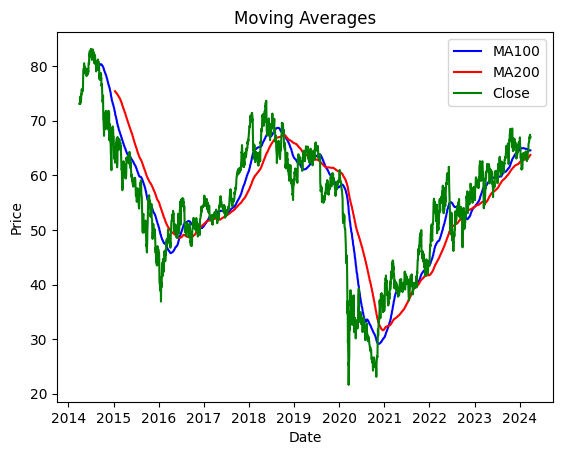

In [4]:
#Moving Averages are used to predict Stockmarket prices = context of previous n terms are provided for the next prediction

# We have over 2517 records

df['MA100'] = df['Close'].rolling(window=100).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()

plt.plot(figsize=(10,5))
plt.plot(df['Date'],df['MA100'] , 'b')
plt.plot(df['Date'],df['MA200'], 'r')
plt.plot(df['Date'],df['Close'], 'g')

plt.legend(['MA100', 'MA200', 'Close'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Moving Averages')
plt.show()


In [5]:
# split the data into training and testing
MA_100 = df['MA100']
MA_200 = df['MA200']
Date = df['Date']
df = df.drop(columns = ['MA100','MA200','Date'] , axis=1)

data_train = pd.DataFrame(df.Close[0:int(len(df)*0.80)])
data_test = pd.DataFrame(df.Close[int(len(df)*0.80):len(df)])


In [40]:
print(data_train)

          Close
0     73.059998
1     73.230003
2     73.129997
3     73.180000
4     73.190002
...         ...
2008  53.439999
2009  53.070000
2010  54.740002
2011  55.020000
2012  55.590000

[2013 rows x 1 columns]


In [6]:
# Will be doing the scaling using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1)) # setting the value to be between 0 & 1

data_train_scaled = scaler.fit_transform(data_train)

# data_test_scaled = scaler.transform(data_test)
print(data_train_scaled)

[[0.83642268]
 [0.83918701]
 [0.83756089]
 ...
 [0.53853658]
 [0.54308941]
 [0.5523577 ]]


In [7]:
#Slicing of Training Dataset and make it ready for prediction
#MA100 = IN this code sample we are using previous 100 records context to predict the next record
x=[]
y=[]

for i in range(100, data_train_scaled.shape[0]):
    x.append(data_train_scaled[i-100:i])
    y.append(data_train_scaled[i,0])

x = np.array(x)
y = np.array(y)

print(x)
print(y)

[[[0.83642268]
  [0.83918701]
  [0.83756089]
  ...
  [0.95853654]
  [0.96341464]
  [0.95089424]]

 [[0.83918701]
  [0.83756089]
  [0.83837395]
  ...
  [0.96341464]
  [0.95089424]
  [0.94585363]]

 [[0.83756089]
  [0.83837395]
  [0.83853659]
  ...
  [0.95089424]
  [0.94585363]
  [0.93723576]]

 ...

 [[0.41983735]
  [0.3951219 ]
  [0.39902436]
  ...
  [0.48032517]
  [0.51739832]
  [0.51138208]]

 [[0.3951219 ]
  [0.39902436]
  [0.38666667]
  ...
  [0.51739832]
  [0.51138208]
  [0.53853658]]

 [[0.39902436]
  [0.38666667]
  [0.37674796]
  ...
  [0.51138208]
  [0.53853658]
  [0.54308941]]]
[0.94585363 0.93723576 0.94065038 ... 0.53853658 0.54308941 0.5523577 ]


In [8]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1))

model.compile(optimizer='Adam', loss='mean_squared_error')
model.fit(x, y, epochs=20, batch_size=32 , verbose=1)

Epoch 1/20
60/60 [==============================] - 41s 559ms/step - loss: 0.0413
Epoch 2/20
60/60 [==============================] - 31s 513ms/step - loss: 0.0112
Epoch 3/20
60/60 [==============================] - 30s 508ms/step - loss: 0.0101
Epoch 4/20
60/60 [==============================] - 33s 543ms/step - loss: 0.0083
Epoch 5/20
60/60 [==============================] - 30s 504ms/step - loss: 0.0081
Epoch 6/20
60/60 [==============================] - 30s 505ms/step - loss: 0.0075
Epoch 7/20
60/60 [==============================] - 32s 535ms/step - loss: 0.0075
Epoch 8/20
60/60 [==============================] - 31s 512ms/step - loss: 0.0063
Epoch 9/20
60/60 [==============================] - 31s 516ms/step - loss: 0.0066
Epoch 10/20
60/60 [==============================] - 33s 538ms/step - loss: 0.0066
Epoch 11/20
60/60 [==============================] - 31s 515ms/step - loss: 0.0057
Epoch 12/20
60/60 [==============================] - 31s 522ms/step - loss: 0.0056
Epoch 13/20
6

In [9]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [29]:
import pickle
pickle.dump(model,open('model.pkl','wb'))

In [10]:
#Now testing the Model

past_100_data = data_train.tail(100)

data_test = pd.concat([past_100_data , data_test] , ignore_index=True)

print(data_test)

         Close
0    45.400002
1    44.790001
2    44.869999
3    45.759998
4    45.790001
..         ...
599  66.919998
600  67.419998
601  66.760002
602  66.760002
603  67.040001

[604 rows x 1 columns]


In [11]:
#Scaling the Test dataset

data_test_scaled = scaler.fit_transform(data_test)

# Applying the Slicing operation to evaluate

x_test = []
y_test = []

for i in range(100, data_test_scaled.shape[0]):
    x_test.append(data_test_scaled[i-100:i])
    y_test.append(data_test_scaled[i,0])

x_test = np.array(x_test)
y_test = np.array(y_test)

print(x_test)
print(y_test)

[[[0.14132051]
  [0.11869438]
  [0.12166166]
  ...
  [0.48775965]
  [0.49814536]
  [0.51928778]]

 [[0.11869438]
  [0.12166166]
  [0.15467351]
  ...
  [0.49814536]
  [0.51928778]
  [0.45956966]]

 [[0.12166166]
  [0.15467351]
  [0.15578636]
  ...
  [0.51928778]
  [0.45956966]
  [0.43991095]]

 ...

 [[0.8735162 ]
  [0.88278919]
  [1.        ]
  ...
  [0.93694346]
  [0.93953988]
  [0.95808588]]

 [[0.88278919]
  [1.        ]
  [0.91060818]
  ...
  [0.93953988]
  [0.95808588]
  [0.93360531]]

 [[1.        ]
  [0.91060818]
  [0.93620174]
  ...
  [0.95808588]
  [0.93360531]
  [0.93360531]]]
[0.45956966 0.43991095 0.52002963 0.49480707 0.52410978 0.52781892
 0.49406522 0.50853107 0.51298207 0.53783377 0.50927293 0.53412463
 0.57307118 0.57566761 0.58382789 0.61201774 0.60385746 0.56083076
 0.51557864 0.45215124 0.4250741  0.45289309 0.49629079 0.4391691
 0.45029666 0.52114235 0.57047476 0.5693619  0.59755189 0.47329366
 0.49517793 0.52967349 0.50556378 0.5604599  0.61090502 0.62870916
 0.62

In [12]:
# pickled_model = pickle.load(open('model.pkl','rb'))
y_pred = model.predict(x_test);
print(y_pred)

16/16 [==============================] - 2s 65ms/step
[[0.38271582]
 [0.40189168]
 [0.42056713]
 [0.43797457]
 [0.45361757]
 [0.46751016]
 [0.4798308 ]
 [0.49037594]
 [0.4989888 ]
 [0.5056393 ]
 [0.5107563 ]
 [0.5143739 ]
 [0.51687026]
 [0.5191973 ]
 [0.52213013]
 [0.52610654]
 [0.531472  ]
 [0.5382011 ]
 [0.5455038 ]
 [0.5519106 ]
 [0.5550907 ]
 [0.552913  ]
 [0.5441538 ]
 [0.53027225]
 [0.5127676 ]
 [0.49363703]
 [0.4766363 ]
 [0.46578246]
 [0.46212673]
 [0.46511537]
 [0.47233844]
 [0.48132747]
 [0.49056745]
 [0.4988135 ]
 [0.5061298 ]
 [0.5132657 ]
 [0.5209823 ]
 [0.5297267 ]
 [0.5395884 ]
 [0.5502732 ]
 [0.5617352 ]
 [0.5738584 ]
 [0.58650684]
 [0.59936154]
 [0.61197656]
 [0.6236306 ]
 [0.6338251 ]
 [0.6421189 ]
 [0.64840394]
 [0.65293294]
 [0.6564897 ]
 [0.65976316]
 [0.6627061 ]
 [0.6642081 ]
 [0.66206837]
 [0.6544578 ]
 [0.64083457]
 [0.6192252 ]
 [0.58848953]
 [0.5514074 ]
 [0.5109504 ]
 [0.46944046]
 [0.42993677]
 [0.39524812]
 [0.36842066]
 [0.3507393 ]
 [0.34281242]
 [0.3434

In [13]:
print(1/scaler.scale_)
scale_val = 1/scaler.scale_

[26.9600029]


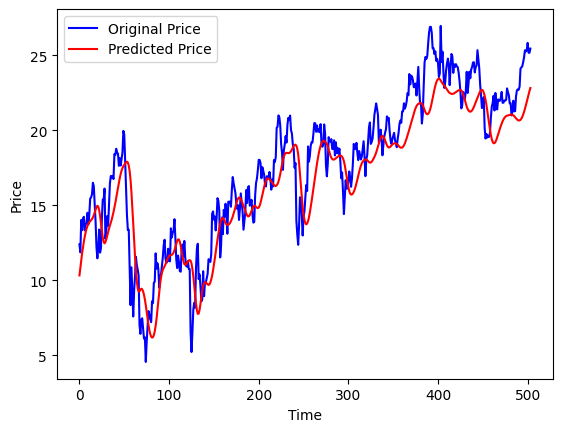

In [14]:
# Inverse Transforming the Predicted and the actual values
y_pred = y_pred*scale_val
y_test = y_test*scale_val

plt.plot(figsize = (10,8))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_pred, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [15]:
y_pred = y_pred/scale_val

1/1 [==============================] - 0s 353ms/step
[[0.75680864]]
1/1 [==============================] - 0s 137ms/step
[[0.7617665]]
1/1 [==============================] - 0s 231ms/step
[[0.7655465]]
1/1 [==============================] - 0s 166ms/step
[[0.76746047]]
1/1 [==============================] - 0s 192ms/step
[[0.76724404]]
1/1 [==============================] - 0s 225ms/step
[[0.7650352]]
1/1 [==============================] - 0s 70ms/step
[[0.76125604]]
1/1 [==============================] - 0s 71ms/step
[[0.7564389]]
1/1 [==============================] - 0s 84ms/step
[[0.75109255]]
1/1 [==============================] - 0s 73ms/step
[[0.7456239]]
1/1 [==============================] - 0s 71ms/step
[[0.74030805]]
1/1 [==============================] - 0s 77ms/step
[[0.7352961]]
1/1 [==============================] - 0s 91ms/step
[[0.73064125]]
1/1 [==============================] - 0s 75ms/step
[[0.72633135]]
1/1 [==============================] - 0s 74ms/step
[[0.722318

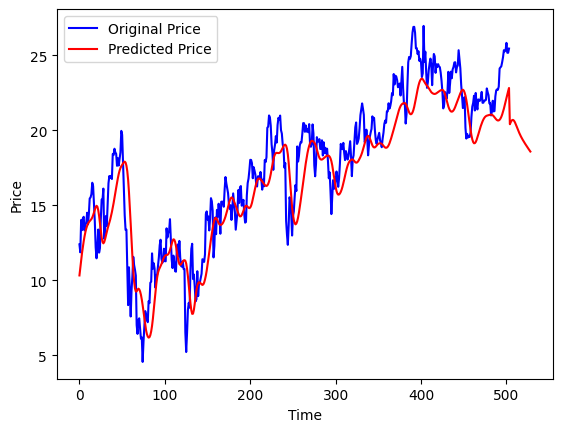

In [16]:
#Recursive Predicting for the next 25days

for i in range(0,25):
    n_pred = model.predict(y_pred[-100:].reshape(1,100,1))
    print(n_pred)
    y_pred = np.append(y_pred,n_pred)

#plot the chart

y_pred = y_pred*scale_val

plt.plot(figsize = (10,8))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_pred, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

(100, 1)
